# Introduction

#### In our project we wanted to focus on quality of life/health as our metric. Therefore we looked at streets with trees, the number of years of residence and Fire Hazards to understand how quality of life is in different Pittsburgh neighborhoods.

#### For average years of residence, Chartiers city was the best, closely followed by East Carnegie. Many of the people here have lived here for over 30 years, which is far greater than any other neighborhood in Pittsburgh.

# Pittsburgh Neighborhood Average Years of Residence 
- link to data set: https://data.wprdc.org/dataset/neighborhoods-with-snap-data/resource/bce22c26-9d3e-4e3f-8405-a35c4b7765b6

In [6]:
import pandas as pd
import geopandas
%matplotlib inline

In [4]:
data = pd.read_csv("snapdata.csv")

#### Reshaping data to only include Neighborhoods and Average Years of Residence 

In [7]:
num_years = data.groupby("Neighborhood_2010_HOOD").sum()['Est__Avg__Yrs__of_Residence__20']
years_sorted = num_years.sort_values(ascending=False)
years_sorted

Neighborhood_2010_HOOD
Chartiers City               32
East Carnegie                30
New Homestead                19
Beltzhoover                  17
South Shore                  16
                             ..
Friendship                    0
Chateau                       0
Central Oakland               0
Central Business District     0
Allegheny Center              0
Name: Est__Avg__Yrs__of_Residence__20, Length: 90, dtype: int64

#### Visualization of Average Years of Residence in each Pittsburgh Neighborhood

<Axes: >

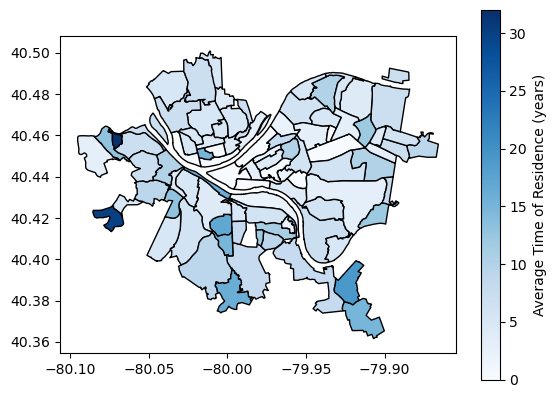

In [11]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
year_map = neighborhoods.merge(num_years, how='left', left_on='hood', right_on='Neighborhood_2010_HOOD')
year_map[['hood','Est__Avg__Yrs__of_Residence__20','geometry']].head()
year_map.plot(column='Est__Avg__Yrs__of_Residence__20', # set the data to be used for coloring
               cmap='Blues',              # choose a color palette
               edgecolor="Black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Average Time of Residence (years)"}, # label the legend
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
             )

#### Bar Chart displaying the top 5 Pittsburgh Neighborhoods for Average Years of Residence

Text(0, 0.5, 'Average Time of Residence (years)')

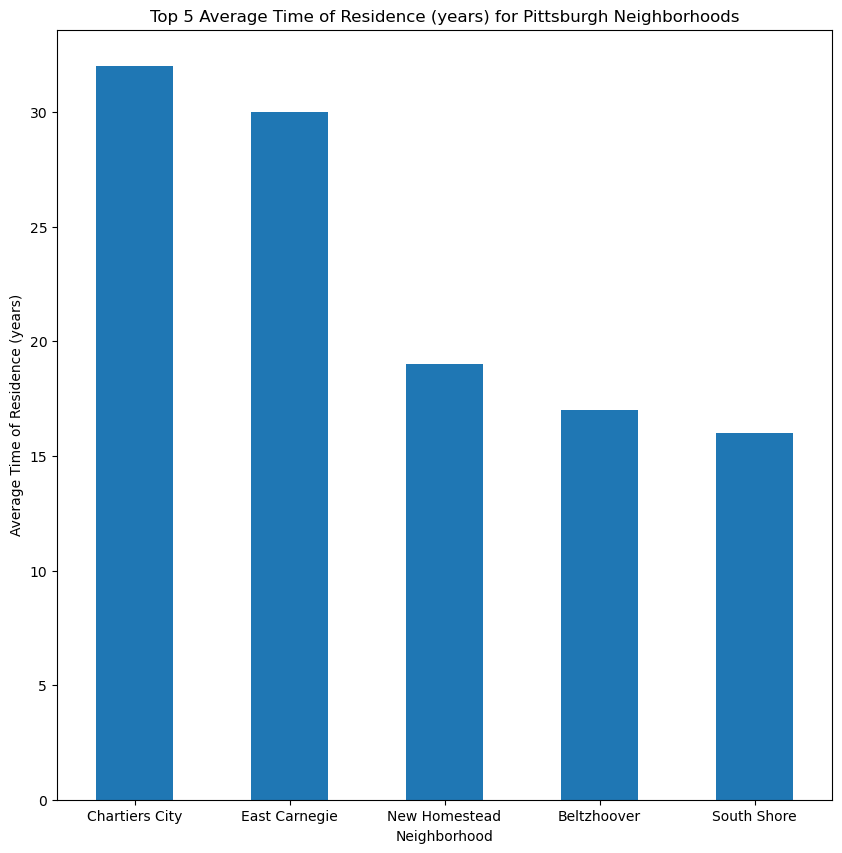

In [10]:
top_5 = years_sorted.head(5)
years_bar = top_5.plot.bar(rot=0,figsize = (10,10))
years_bar.set_title('Top 5 Average Time of Residence (years) for Pittsburgh Neighborhoods')
years_bar.set_xlabel('Neighborhood')
years_bar.set_ylabel('Average Time of Residence (years)')

# Pittsburgh Neighborhood Street Tree Data
- link to data set: https://data.wprdc.org/dataset/neighborhoods-with-snap-data/resource/bce22c26-9d3e-4e3f-8405-a35c4b7765b6

#### Reshaping data to only include Neighborhoods and Number of Street Trees

In [10]:
num_trees = data.groupby("Neighborhood_2010_HOOD").sum()['SNAP_All_csv___Street_Trees']
trees_sorted = num_trees.sort_values(ascending=False)
trees_sorted

Neighborhood_2010_HOOD
Squirrel Hill South    2263
Squirrel Hill North    1846
Shadyside              1601
South Side Flats       1337
Point Breeze           1092
                       ... 
Mt. Oliver                7
Fairywood                 6
Hays                      4
Arlington Heights         3
Glen Hazel                0
Name: SNAP_All_csv___Street_Trees, Length: 90, dtype: int64

#### Visualization of number of street trees in each Pittsburgh Neighborhood

<Axes: >

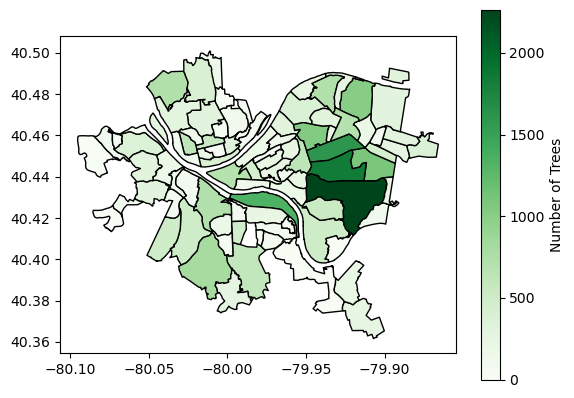

In [32]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
trees_map = neighborhoods.merge(num_trees, how='left', left_on='hood', right_on='Neighborhood_2010_HOOD')
trees_map[['hood','SNAP_All_csv___Street_Trees','geometry']].head()
trees_map.plot(column='SNAP_All_csv___Street_Trees', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="Black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Trees"}, # label the legend
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

#### Bar Chart displaying the top 5 Pittsburgh Neighborhoods with most trees 

Text(0, 0.5, 'Number of Street Trees')

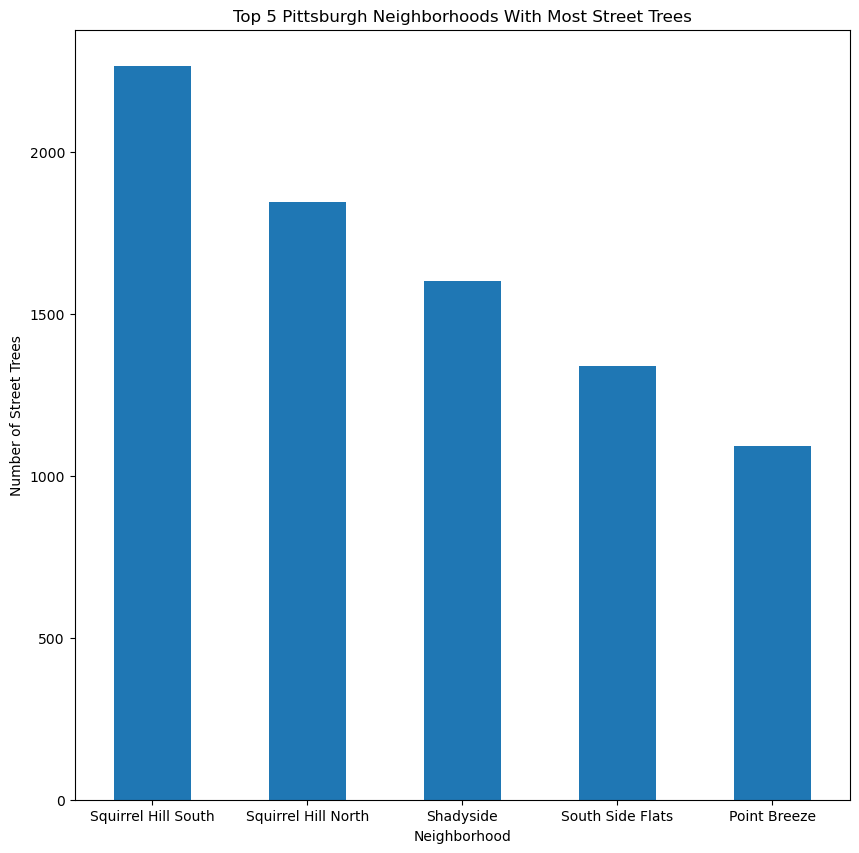

In [13]:
top_5 = trees_sorted.head(5)
tree_bar = top_5.plot.bar(rot=0,figsize = (10,10))
tree_bar.set_title('Top 5 Pittsburgh Neighborhoods With Most Street Trees')
tree_bar.set_xlabel('Neighborhood')
tree_bar.set_ylabel('Number of Street Trees')

# The next submetric is fire hazards. 

### First we need to clean and filter the dataset. We are looking at fire incidents in the city of Pittsburgh. We will show the 5 neighborhoods with the least number of incidents.

In [22]:
file_path = '8d76ac6b-5ae8-4428-82a4-043130d17b02.csv'

fire_data = pd.read_csv(file_path)

fire_data_cleaned = fire_data.dropna(subset=['neighborhood'])
neighborhood_fire_counts = fire_data_cleaned['neighborhood'].value_counts()

fire_hazard_summary = neighborhood_fire_counts.reset_index()
fire_hazard_summary.columns = ['neighborhood', 'fire_count']
fire_hazard_summary = fire_hazard_summary.sort_values(by='fire_count', ascending=True)

fire_hazard_summary.head()




,neighborhood,fire_count
90,Mount Oliver Borough,6
89,Regent Square,9
88,East Carnegie,11
87,Mt. Oliver,12
86,Ridgemont,12


## Visualization

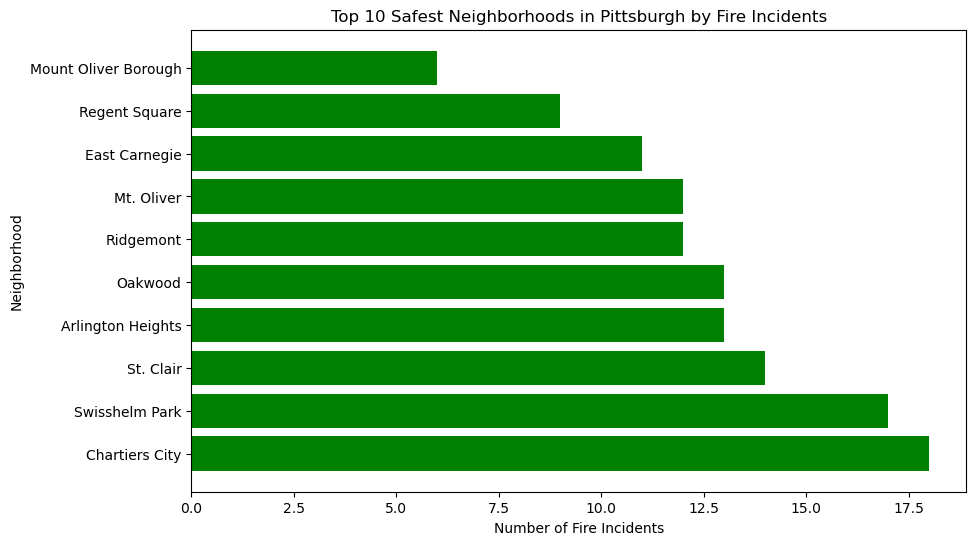

In [30]:
import matplotlib.pyplot as plt

# Visualize the top 10 safest neighborhoods
top_safe_neighborhoods = fire_hazard_summary.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_safe_neighborhoods['neighborhood'], top_safe_neighborhoods['fire_count'], color='green')
plt.xlabel('Number of Fire Incidents')
plt.ylabel('Neighborhood')
plt.title('Top 10 Safest Neighborhoods in Pittsburgh by Fire Incidents')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


### As you can see according to this sub metric, Mount Oliver Borough is the best neighborhood. Eas 

# Conclusions

#### For amount of trees, Squirrel Hill south and north were also the best, meaning that in two categories they both led in a big way. This shows that quality of life and making the people who live in these areas really enjoy the place and community they live in is important to these neighborhoods.

#### For Fire Hazard safety, Mount Oliver led. East Carnegie also showed up as third.

#### It could be argued that East Carnegie is the best neighborhood to live in because it has a high average time of residence and also has very low Fire Hazards. 

## Rowan  
Based on our sub metrics I have reasons to conclude that East Carnegie would be the best Pittsburgh Neighborhood for overall quality of life. With an estimated 30 years of average residence along with being the third best neighborhood in terms of fire safety the neighborhood clearly displays a positive quality of life; indicated by the areas residents dersire to remain living in East Carnegie. 